# Lab Assignment Five: Wide and Deep Network Architectures
In this lab, you will select a prediction task to perform on your dataset, evaluate two different deep learning architectures and tune hyper-parameters for each architecture. If any part of the assignment is not clear, ask the instructor to clarify. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.

## Dataset Selection

Select a dataset similarly to lab one. That is, the dataset must be table data and must have categorical features. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification, multi-class classification, or regression. You are NOT allowed to use the census (i.e., Adult) dataset that was given as an example in class. 

we have selected this dataset: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data



## Grading Rubric

### Preparation (4 points total)
- [1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required. 

- [1 points] Identify groups of features in your data that should be combined into cross-product features. Provide a compelling justification for why these features should be crossed (or why some features should not be crossed). 

- [1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

- [1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. Use the method to split your data that you argue for. 


In [208]:
import pandas as pd

df = pd.read_csv('car_prices.csv')
headers = df.columns
# df = df.head(100000)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None


[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required.

We first decide to drop anything that has missing values rather than try to impute new values, since there is still plenty of data and the points of this lab is not data cleaning.

In [209]:
df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB
None


In [210]:
#other years have limited entries, so we will focus on 2005-2014
from tensorflow.keras.metrics import AUC

df = df[df['year'] >= 2005]
df = df[df['year'] < 2015]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 417707 entries, 2 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          417707 non-null  int64  
 1   make          417707 non-null  object 
 2   model         417707 non-null  object 
 3   trim          417707 non-null  object 
 4   body          417707 non-null  object 
 5   transmission  417707 non-null  object 
 6   vin           417707 non-null  object 
 7   state         417707 non-null  object 
 8   condition     417707 non-null  float64
 9   odometer      417707 non-null  float64
 10  color         417707 non-null  object 
 11  interior      417707 non-null  object 
 12  seller        417707 non-null  object 
 13  mmr           417707 non-null  float64
 14  sellingprice  417707 non-null  float64
 15  saledate      417707 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 54.2+ MB
None


In [211]:
df['year'].value_counts()


year
2013    87467
2012    87380
2014    69712
2011    41384
2008    27011
2007    25378
2010    22616
2006    21631
2009    17959
2005    17169
Name: count, dtype: int64

[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required.

Now, we convert the selling price column into two intervals so that we can binary predict it.

In [212]:
import pandas as pd

# Define the intervals for the selling price column
intervals = [0,12500, float('inf')]

# Create a new column with the interval labels
df['price_interval'] = pd.cut(df['sellingprice'], bins=intervals)

# Count the number of entries in each interval
interval_counts = df['price_interval'].value_counts()

# Print the number of entries in each interval
print(interval_counts)


price_interval
(12500.0, inf]    219069
(0.0, 12500.0]    198638
Name: count, dtype: int64


We notice below that there is a lot of categorical data with many different types, so we need to reduce that first.

In [213]:
unique_trim = df['trim'].unique()
print(unique_trim)

['328i SULEV' '650i' 'Base' ... 'pure' 'EWB' 'Power Wagon']


In [214]:
unique_model = df['model'].unique()
print(unique_model)

['3 Series' '6 Series Gran Coupe' 'M5' 'Cruze' 'A4' 'Camaro' 'A6' 'Q5'
 '6 Series' '5 Series' 'SQ5' 'S5' 'ELR' 'X6' 'ILX' 'A8' 'X1' 'Enclave'
 'TTS' '4 Series' 'MDX' 'Silverado 1500' 'SRX' 'X5' 'G Coupe' 'G Sedan'
 'FX' 'Santa Fe' 'Genesis' 'Equus' 'Elantra' 'Sonata' 'Sonata Hybrid'
 'Accent' 'Veloster' 'Elantra Coupe' 'Azera' 'Tucson' 'Genesis Coupe'
 'Wrangler' 'Optima' 'Altima' 'S-Class' 'GS 350' 'Outlander' 'C-Class'
 'Mazda2' 'Rio' 'M' '370Z' 'Soul' 'Sorento' 'Outlander Sport' 'SLK-Class'
 'ES 350' 'E-Class' 'Mazda3' 'Cooper Clubman' 'Cooper' 'CX-9' 'Forte'
 'Compass' 'JX' 'LR4' 'Mazda5' 'Range Rover Evoque' 'LS 460' 'GLK-Class'
 'Sportage' 'Grand Cherokee' 'MKX' 'XF' 'GL-Class' 'M-Class'
 'Cooper Countryman' 'RX 350' 'Lancer' 'Range Rover Sport' 'Passat'
 'Corolla' 'XC60' 'Sienna' 'Juke' 'Yaris' 'NV' 'CC' 'Leaf' 'Camry'
 'Tacoma' 'Jetta' 'Impreza WRX' 'FJ Cruiser' 'Beetle' 'Avalon' 'FR-S'
 'NV200' 'Rogue' 'Tundra' 'Maxima' 'Cayenne' '911' 'Xterra' 'Versa'
 'Sentra' 'Prius' 'S80' 

In [215]:
unique_makes = df['body'].unique()
print(unique_makes)
len(unique_makes)

['Sedan' 'Convertible' 'SUV' 'Coupe' 'Crew Cab' 'G Coupe' 'G Sedan'
 'Hatchback' 'Elantra Coupe' 'Genesis Coupe' 'Wagon' 'Minivan' 'Van'
 'Double Cab' 'CrewMax Cab' 'Access Cab' 'King Cab' 'CTS Coupe'
 'SuperCrew' 'E-Series Van' 'Extended Cab' 'SuperCab' 'G Convertible'
 'Koup' 'Regular Cab' 'Quad Cab' 'CTS-V Coupe' 'sedan' 'G37 Convertible'
 'Club Cab' 'Q60 Convertible' 'CTS Wagon' 'G37 Coupe' 'Mega Cab'
 'Cab Plus 4' 'Q60 Coupe' 'Beetle Convertible' 'TSX Sport Wagon'
 'Promaster Cargo Van' 'GranTurismo Convertible' 'CTS-V Wagon'
 'convertible' 'minivan' 'van' 'regular-cab' 'suv' 'g sedan' 'g coupe'
 'hatchback' 'king cab' 'supercrew' 'g convertible' 'coupe' 'crew cab'
 'wagon' 'e-series van' 'regular cab' 'quad cab' 'g37 convertible'
 'supercab' 'extended cab' 'crewmax cab' 'double cab' 'genesis coupe'
 'access cab' 'mega cab' 'beetle convertible' 'cts coupe' 'koup'
 'club cab' 'elantra coupe' 'cts-v coupe' 'granturismo convertible'
 'tsx sport wagon' 'promaster cargo van' 'q60 conve

79

Here, we convert the body field to have less options.

In [216]:
df['body'] = df['body'].str.lower()
replacements = {
    'convertible': 'convertible',
    'coupe|koup': 'coupe',
    'cab|crew': 'cab',
    'van': 'van',
    'wagon': 'wagon',
    'sedan': 'sedan'
}

for key, value in replacements.items():
    df.loc[df['body'].str.contains(key, case=False), 'body'] = value

In [217]:
unique_makes = df['body'].unique()
print(unique_makes)
df['body'].value_counts()

['sedan' 'convertible' 'suv' 'coupe' 'cab' 'hatchback' 'wagon' 'van']


body
sedan          195081
suv            105395
cab             35395
van             24024
hatchback       22121
coupe           15177
wagon           12756
convertible      7758
Name: count, dtype: int64

In [218]:
# should we use string for ordinal data? or should we use integers?

ranges = [(0, 11, 'poor'), (11, 21, 'not good'), (21, 31, 'fair'), (31, 41, 'good'), (41, 51, 'great')]

for start, end, label in ranges:
    df['condition'] = df['condition'].replace(range(start, end), label)


In [219]:
df.drop('mmr', axis=1, inplace=True)

Basically, we cleaned the dataset of any non-full rows and we also reduced the amount of categorical data there was. The final data is described above. 

In [220]:
from sklearn.model_selection import train_test_split

df_train_orig, df_test_orig = train_test_split(df, test_size=0.2, random_state=37)

In [221]:
from copy import deepcopy
df_train = deepcopy(df_train_orig)
df_test = deepcopy(df_test_orig)

In [222]:
import numpy as np

df_train.reset_index()
df_test.reset_index()

df_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,price_interval
387952,2008,Jeep,Liberty,Sport,suv,automatic,1j8gn28k18w195884,oh,great,126044.0,red,gray,tc's used cars llc,7800.0,Tue Mar 03 2015 01:30:00 GMT-0800 (PST),"(0.0, 12500.0]"
369170,2014,Lincoln,MKX,Base,suv,automatic,2lmdj8jk4ebl06749,tn,great,10077.0,—,beige,ford motor credit company,34000.0,Thu Mar 05 2015 03:00:00 GMT-0800 (PST),"(12500.0, inf]"
165759,2007,GMC,Yukon,SLE,suv,automatic,1gkfk13047r312578,md,great,90057.0,blue,beige,lexus of rockville,15400.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),"(12500.0, inf]"
113164,2012,Toyota,Prius c,Two,hatchback,automatic,jtdkdtb34c1509187,pa,fair,54808.0,black,gray,ken pollock nissan llc,9000.0,Fri Jan 16 2015 01:00:00 GMT-0800 (PST),"(0.0, 12500.0]"
75538,2011,GMC,Yukon,SLT,suv,automatic,1gks1ce05br150916,ca,poor,61831.0,black,black,rvr,24500.0,Wed Dec 31 2014 12:30:00 GMT-0800 (PST),"(12500.0, inf]"


In [223]:
#encode the label of target as an integer
from sklearn.preprocessing import LabelEncoder
tmp = LabelEncoder()
df_train.price_interval = tmp.fit_transform(df_train.price_interval)
df_test.price_interval = tmp.transform(df_test.price_interval)

In [224]:
# define variables that should be encoded as integers   
encoders = dict() # save each encoder in dictionary
categorical_headers = ['make','model','body','transmission',
                       'color','interior','state','trim','condition']

# get unique values in each feature
for col in categorical_headers:
    print(f'{col} has {len(df_train[col].unique())} unique values.')
    

# ========================================================
# define variables that should be scaled or made discrete
numeric_headers = ['odometer','year']
df_train[numeric_headers] = df_train[numeric_headers].to_numpy().astype(float)
df_test[numeric_headers] = df_test[numeric_headers].to_numpy().astype(float)
    
df_test.head()

make has 49 unique values.
model has 604 unique values.
body has 8 unique values.
transmission has 2 unique values.
color has 20 unique values.
interior has 17 unique values.
state has 34 unique values.
trim has 1124 unique values.
condition has 5 unique values.


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,price_interval
387952,2008.0,Jeep,Liberty,Sport,suv,automatic,1j8gn28k18w195884,oh,great,126044.0,red,gray,tc's used cars llc,7800.0,Tue Mar 03 2015 01:30:00 GMT-0800 (PST),0
369170,2014.0,Lincoln,MKX,Base,suv,automatic,2lmdj8jk4ebl06749,tn,great,10077.0,—,beige,ford motor credit company,34000.0,Thu Mar 05 2015 03:00:00 GMT-0800 (PST),1
165759,2007.0,GMC,Yukon,SLE,suv,automatic,1gkfk13047r312578,md,great,90057.0,blue,beige,lexus of rockville,15400.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),1
113164,2012.0,Toyota,Prius c,Two,hatchback,automatic,jtdkdtb34c1509187,pa,fair,54808.0,black,gray,ken pollock nissan llc,9000.0,Fri Jan 16 2015 01:00:00 GMT-0800 (PST),0
75538,2011.0,GMC,Yukon,SLT,suv,automatic,1gks1ce05br150916,ca,poor,61831.0,black,black,rvr,24500.0,Wed Dec 31 2014 12:30:00 GMT-0800 (PST),1


In [225]:
print(df_train['sellingprice'].unique())
print(df_train['odometer'].unique())
condition_unique = df_train['sellingprice'].nunique()
odometer_unique = df_train['odometer'].nunique()

print(f"Number of unique values in 'sellingprice': {condition_unique}")
print(f"Number of unique values in 'odometer': {odometer_unique}")


[ 3600. 10400. 37800. ... 57700. 19380. 59900.]
[101930.  42210.   7176. ...  80082.  86425. 107224.]
Number of unique values in 'sellingprice': 1642
Number of unique values in 'odometer': 128756


In [226]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
import sys
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'
print(tf.__version__)
print(sys.version)

2.16.1
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [227]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [228]:
# create a tensorflow dataset, for ease of use later
batch_size = 64

def create_dataset_from_dataframe(df_input):

    df = df_input.copy()
    labels = df['price_interval']

    df = {key: value.values[:,np.newaxis] for key, value in df_input[categorical_headers+numeric_headers].items()}

    # create the Dataset here
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    
    # now enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    
    return ds

ds_train = create_dataset_from_dataframe(df_train)
ds_test = create_dataset_from_dataframe(df_test)

In [229]:
# here is an example of what the data looks like from this class
[(feat,label)] = ds_train.take(1)
print('The keys in the feature data are:')
print(feat.keys())
print('\nThe feature shape for age is:')
print('Shape:',feat['year'].shape)
print('Max:',max(feat['year']))
print('\nThe labels for this batch are:')
print(label) # print one batch of the labels 

The keys in the feature data are:
dict_keys(['make', 'model', 'body', 'transmission', 'color', 'interior', 'state', 'trim', 'condition', 'odometer', 'year'])

The feature shape for age is:
Shape: (64, 1)
Max: tf.Tensor([2014.], shape=(1,), dtype=float64)

The labels for this batch are:
tf.Tensor(
[0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0], shape=(64,), dtype=int32)


In [230]:
# setup the naive example with the numeric data, only


# setup different inputs manually  
# each of these will be expected from the tf.data input
all_branch_inputs = []
for feat_name in numeric_headers:
    # the model expects each input to be named 'feat_name'
    tmp = Input(shape=(1,), dtype="float32", name=feat_name)
    all_branch_inputs.append(tmp)
    
# now concatenate all the inputs together into one big vector
x = Concatenate(name='concat_1')(all_branch_inputs)

x = Dense(16, activation="relu")(x)
x = Dense(8, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

# no need to compile this, change the process to use Gradient tape
training_model = keras.Model(inputs=all_branch_inputs, 
                             outputs=predictions)


training_model.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_1            │ (None, 2)         │          0 │ odometer[0][0],   │
│ (Concatenate)       │                   │            │ year[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 16)        │         48 │ concat_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 8)         │        136 │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 1)         │          9 │ dense_26[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [231]:
#needs graphviz installed

# plot_model(
#     training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

In [232]:
# import the loss function we plan to use
from tensorflow.keras.losses import binary_crossentropy
# import a built in optimizer
# I am using legacy for an M1 chipset speed
from tensorflow.keras.optimizers import Adam

opt = Adam() #default optimizer parameters
num_epochs = 2

for e in range(num_epochs):
    # iterating over this is one full epoch
    for (features,labels) in ds_train: # use tf.data iterator
        
        # here features is a dictionary of the variables
        # now the features and labels are for one batch
        with tf.GradientTape(watch_accessed_variables=True, persistent=True) as tape:
            # put through the model
            yhat = training_model(features)
            
            # get the loss function
            # squeeze operation gets rid of extra dimensions that are unneeded
            loss = binary_crossentropy(tf.squeeze(labels), tf.squeeze(yhat))

        # update via auto diff and specified optimizer
        # get the gradients according to the loss function with respect to all variables
        grads = tape.gradient(loss, training_model.trainable_variables)
        # apply those gradients to the variables, this updates the trainiable weights
        opt.apply_gradients(zip(grads, training_model.trainable_variables))
        
    # at the end of the epoch, print results on validation set
    # here we can see that many funcitons have a numpy equivalent 
    num_points = 0
    num_correct = 0
    for (features,labels) in ds_test:
        num_points += len(labels.numpy())
        yhat_proba = training_model(features)
        yhat = tf.round(yhat_proba).numpy()
        
        num_correct += sum(np.squeeze(yhat)==labels.numpy())
        
    print(f'Finished epoch {e}, with validation accuracy: {num_correct/num_points}')
        

Finished epoch 0, with validation accuracy: 0.4757487251921189


KeyboardInterrupt: 

In [ ]:
# Before using the fit function, the model needs some additional 
# information, which we can add by compiling it
training_model.compile(
    optimizer="adam", 
    loss="binary_crossentropy", 
    metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

In [ ]:
# we can also just use some built in fitting functionality in keras, 
# if we do not want to  control all the ways in which gradients, etc. are used
history = training_model.fit(
    ds_train, epochs=10, validation_data=ds_test, verbose=2
)

Epoch 1/10
5222/5222 - 13s - 3ms/step - accuracy: 0.6477 - loss: 58.8267 - val_accuracy: 0.7194 - val_loss: 1.9566
Epoch 2/10
5222/5222 - 8s - 1ms/step - accuracy: 0.6545 - loss: 3.4506 - val_accuracy: 0.7439 - val_loss: 1.5448
Epoch 3/10
5222/5222 - 11s - 2ms/step - accuracy: 0.6556 - loss: 2.7700 - val_accuracy: 0.7321 - val_loss: 1.1908
Epoch 4/10
5222/5222 - 11s - 2ms/step - accuracy: 0.6577 - loss: 2.4189 - val_accuracy: 0.7046 - val_loss: 2.0448
Epoch 5/10
5222/5222 - 11s - 2ms/step - accuracy: 0.6649 - loss: 1.7259 - val_accuracy: 0.5755 - val_loss: 1.8770
Epoch 6/10
5222/5222 - 11s - 2ms/step - accuracy: 0.6772 - loss: 1.1180 - val_accuracy: 0.7382 - val_loss: 0.5637
Epoch 7/10
5222/5222 - 10s - 2ms/step - accuracy: 0.6981 - loss: 0.7213 - val_accuracy: 0.7343 - val_loss: 0.5392
Epoch 8/10
5222/5222 - 10s - 2ms/step - accuracy: 0.7352 - loss: 0.5476 - val_accuracy: 0.7443 - val_loss: 0.5316
Epoch 9/10
5222/5222 - 10s - 2ms/step - accuracy: 0.7374 - loss: 0.5449 - val_accuracy: 

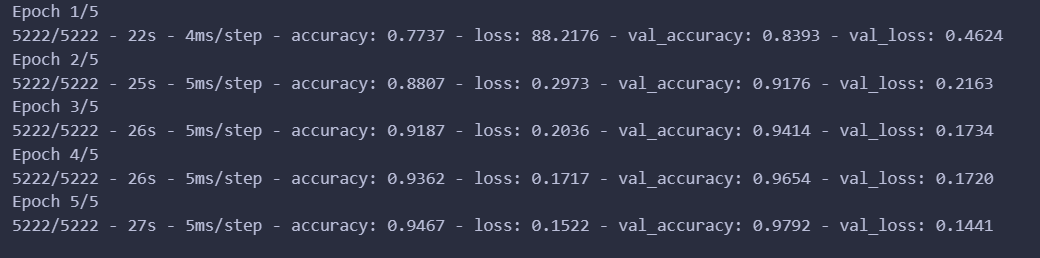

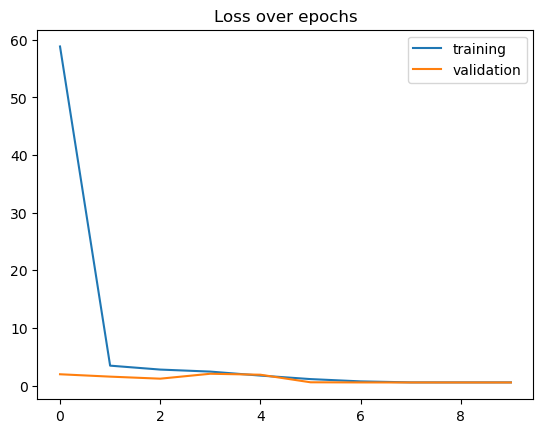

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.title('Loss over epochs')
plt.show()

In [ ]:
from tensorflow.keras.utils import FeatureSpace

# Example One: Just lump everything together, and concatenate
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    output_mode="concat", # can also be a dict, processed internally
)

# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# now that we have specified the preprocessing, let's run it on the data

# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)  
feature_space.adapt(train_ds_with_no_labels) # inititalize the feature map to this data
# the adapt function allows the model to learn one-hot encoding sizes

# now define a preprocessing operation that returns the processed features
preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y), 
                                     num_parallel_calls=tf.data.AUTOTUNE)
# run it so that we can use the pre-processed data
preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

# do the same for the test set
preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.metrics import AUC

# these are the placeholder inputs in the computation graph BEFORE 
# applying and transformations
dict_inputs = feature_space.get_inputs() # getting inputs is WAY easier now

# these are the encoded features after they have been processed
# We can use these as additional inpits into the computation graph
encoded_features = feature_space.get_encoded_features() # these features have been encoded
# using feature space above, this will result in 131 concatenated features
# this is calucalted based on the one-hot encodings for each category

# now lets create some layers with Keras
x = keras.layers.Dense(64, activation="relu")(encoded_features)
x = keras.layers.Dense(32, activation="relu")(x)
predictions = keras.layers.Dense(1, activation="sigmoid")(x)

# we can now create two input/outputs to the computation graph

# this expects features already transformed
training_model = keras.Model(inputs=encoded_features, 
                             outputs=predictions)
training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

# this expects features that are not transformed 
inference_model = keras.Model(inputs=dict_inputs, 
                              outputs=predictions)
inference_model.compile(loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')])

inference_model.summary()

# plot_model(
#     training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ body (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ make (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ body[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ color[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ condition[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ interior[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ make[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ model[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ state[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ transmission[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ trim[0][0]      

 Total params: 127,943 (499.79 KB)

 Trainable params: 127,937 (499.75 KB)

 Non-trainable params: 6 (32.00 B)

In [ ]:
def find_feature_with_value(dataset, value):
    for batch in dataset:
        features, _ = batch
        for feature_name, feature_values in features.items():
            try:
                # Try to convert the value to a float and create a tensor of the same type as the feature values
                value_to_find = tf.constant(float(value), dtype=feature_values.dtype)
                if feature_values.dtype in [tf.float32, tf.float64]:
                    if tf.reduce_any(tf.equal(feature_values, value_to_find)):
                        return feature_name
            except ValueError:
                # If the value cannot be converted to a float, create a string tensor
                value_to_find = tf.constant(value, dtype=tf.string)
                if feature_values.dtype == tf.string:
                    if tf.reduce_any(tf.equal(feature_values, value_to_find)):
                        return feature_name
    return None

value_to_find = "mdx"
feature_name = find_feature_with_value(ds_test, value_to_find)

if feature_name is None:
    print(f"No feature found with value {value_to_find}")
else:
    print(f"Feature '{feature_name}' has value {value_to_find}")

Feature 'model' has value mdx


In [ ]:
#there was a stupid idiot retarded error so i had to find what was causing it

def find_feature_with_value(dataset, value):
    for batch in dataset:
        features, _ = batch
        for feature_name, feature_values in features.items():
            if feature_values.dtype == tf.string:
                value_to_find = tf.constant(value, dtype=tf.string)
            elif feature_values.dtype == tf.float64:
                value_to_find = tf.constant(float(value), dtype=tf.float64)
            else:
                value_to_find = tf.constant(float(value), dtype=tf.float32)
            if tf.reduce_any(tf.equal(feature_values, value_to_find)):
                return feature_name
    return None

value_to_find = "3.5"
feature_name = find_feature_with_value(ds_test, value_to_find)

if feature_name is None:
    print(f"No feature found with value {value_to_find}")
else:
    print(f"Feature '{feature_name}' has value {value_to_find}")

Feature 'trim' has value 3.5


In [ ]:
# train using the already processed features
history = training_model.fit(
    preprocessed_ds_train, epochs=5, validation_data=preprocessed_ds_test, verbose=2
)

Epoch 1/5
5222/5222 - 23s - 4ms/step - Precision: 0.9320 - Recall: 0.9370 - accuracy: 0.9311 - auc: 0.9829 - loss: 0.1665 - val_Precision: 0.9280 - val_Recall: 0.9546 - val_accuracy: 0.9373 - val_auc: 0.9861 - val_loss: 0.1513
Epoch 2/5
5222/5222 - 20s - 4ms/step - Precision: 0.9412 - Recall: 0.9471 - accuracy: 0.9412 - auc: 0.9875 - loss: 0.1416 - val_Precision: 0.9325 - val_Recall: 0.9541 - val_accuracy: 0.9397 - val_auc: 0.9871 - val_loss: 0.1445
Epoch 3/5
5222/5222 - 22s - 4ms/step - Precision: 0.9442 - Recall: 0.9499 - accuracy: 0.9443 - auc: 0.9887 - loss: 0.1344 - val_Precision: 0.9331 - val_Recall: 0.9556 - val_accuracy: 0.9408 - val_auc: 0.9875 - val_loss: 0.1425
Epoch 4/5
5222/5222 - 22s - 4ms/step - Precision: 0.9463 - Recall: 0.9514 - accuracy: 0.9462 - auc: 0.9894 - loss: 0.1296 - val_Precision: 0.9354 - val_Recall: 0.9549 - val_accuracy: 0.9418 - val_auc: 0.9876 - val_loss: 0.1413
Epoch 5/5
5222/5222 - 23s - 4ms/step - Precision: 0.9479 - Recall: 0.9526 - accuracy: 0.9477

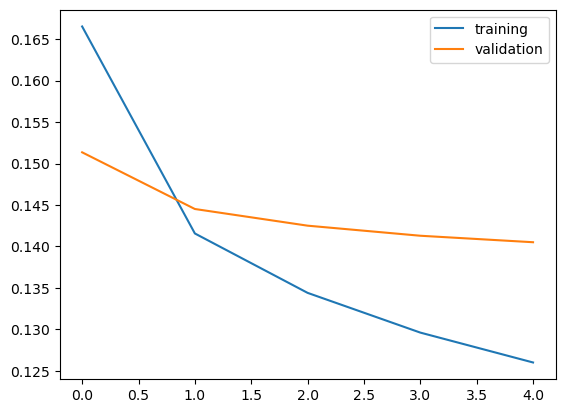

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [ ]:
# can also run evaluation, batch by batch and aggregate the results
inference_model.evaluate(ds_test)

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Precision: 0.9350 - Recall: 0.9531 - accuracy: 0.9412 - auc: 0.9875 - loss: 0.1422


[0.14050519466400146,
 0.9425079822540283,
 0.9377806782722473,
 0.9536041021347046,
 0.9877135753631592]

In [ ]:
from tensorflow.keras.layers import Embedding, Flatten

def setup_embedding_from_categorical(feature_space, col_name):
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    
    # get the output from the feature space, which is input to embedding
    x = feature_space.preprocessors[col_name].output
    
    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)),
                   name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x # return the tensor here 

In [ ]:
from tensorflow.keras.layers import Layer
class CastToFloat(Layer):
    def call(self, inputs):
        return tf.cast(inputs, tf.float32)

In [ ]:
    
dict_inputs = feature_space.get_inputs() # need to use unprocessed features here, to gain access to each output

# some lists for keeping track of parts of the model
all_branch_outputs = [] # this is where we will keep track of output of each branch

# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
    all_branch_outputs.append(x)
    
    
# for each numeric variable, just add it in after embedding
for col in numeric_headers:
    x = feature_space.preprocessors[col].output
    x = CastToFloat()(x) # cast an integer as a float here
    all_branch_outputs.append(x)
    
# now concatenate the outputs and add a fully connected layer
final_branch = Concatenate(name='concat_1')(all_branch_outputs)
final_branch = Dense(units=1,
                     activation='sigmoid', 
                     name='combined')(final_branch)

# here, since we are accessing the string lookup data directly, 
#. we cannot use the already processed data
training_model = keras.Model(inputs=dict_inputs, 
                             outputs=final_branch)

training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

training_model.summary()

# plot_model(
#     training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ make (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ make[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ model[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ body[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ transmission[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ color[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ interior[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ state[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ trim[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ condition[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odometer            │ (None, 1)         │          0 │ -               

 Total params: 57,048 (222.85 KB)

 Trainable params: 57,042 (222.82 KB)

 Non-trainable params: 6 (32.00 B)

In [ ]:
history = training_model.fit(
    ds_train, epochs=5, validation_data=ds_test, verbose=2
)

Epoch 1/5
5222/5222 - 14s - 3ms/step - accuracy: 0.9170 - loss: 0.2168 - val_accuracy: 0.9319 - val_loss: 0.1724
Epoch 2/5
5222/5222 - 13s - 2ms/step - accuracy: 0.9347 - loss: 0.1651 - val_accuracy: 0.9349 - val_loss: 0.1656
Epoch 3/5
5222/5222 - 13s - 2ms/step - accuracy: 0.9362 - loss: 0.1615 - val_accuracy: 0.9355 - val_loss: 0.1644
Epoch 4/5
5222/5222 - 13s - 2ms/step - accuracy: 0.9369 - loss: 0.1605 - val_accuracy: 0.9358 - val_loss: 0.1640
Epoch 5/5
5222/5222 - 13s - 2ms/step - accuracy: 0.9371 - loss: 0.1599 - val_accuracy: 0.9359 - val_loss: 0.1638


## crossed columns


In [ ]:
from tensorflow.keras.utils import FeatureSpace

# Crossing columns together 
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('condition','make'), # dims: 7 x 14 = 
            crossing_dim=5*49),
        FeatureSpace.cross(
            feature_names=('body','transmission',), # 7 x 2 x 5
            crossing_dim=8*2),
        FeatureSpace.cross(
            feature_names=('interior','color'), # 14 x 16
            crossing_dim=17*20),
    ],
    output_mode="concat",
)
# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# add explanation of this pre-processing here
train_ds_with_no_labels = ds_train.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)

In [ ]:
def setup_embedding_from_crossing(feature_space, col_name):
    # what the maximum integer value for this variable?
    
    # get the size of the feature
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x

## combining 

In [ ]:
dict_inputs = feature_space.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space.preprocessors[col].output
    x = CastToFloat()(x) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

training_model.summary()



Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ make (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ make[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ model[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ body[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ transmission[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ color[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ interior[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ state[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ trim[0][0]        │
│ (StringLookup)      │                   │            │                 

 Total params: 72,753 (284.20 KB)

 Trainable params: 72,747 (284.17 KB)

 Non-trainable params: 6 (32.00 B)

In [ ]:
plot_model(
    training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
history = training_model.fit(
    ds_train, epochs=5, validation_data=ds_test, verbose=2
)

Epoch 1/5
5222/5222 - 18s - 3ms/step - accuracy: 0.9301 - loss: 0.1697 - val_accuracy: 0.9368 - val_loss: 0.1522
Epoch 2/5
5222/5222 - 15s - 3ms/step - accuracy: 0.9394 - loss: 0.1452 - val_accuracy: 0.9395 - val_loss: 0.1455
Epoch 3/5
5222/5222 - 15s - 3ms/step - accuracy: 0.9417 - loss: 0.1388 - val_accuracy: 0.9402 - val_loss: 0.1430
Epoch 4/5
5222/5222 - 15s - 3ms/step - accuracy: 0.9435 - loss: 0.1351 - val_accuracy: 0.9416 - val_loss: 0.1415
Epoch 5/5
5222/5222 - 15s - 3ms/step - accuracy: 0.9445 - loss: 0.1325 - val_accuracy: 0.9419 - val_loss: 0.1411


Text(0.5, 0, 'epochs')

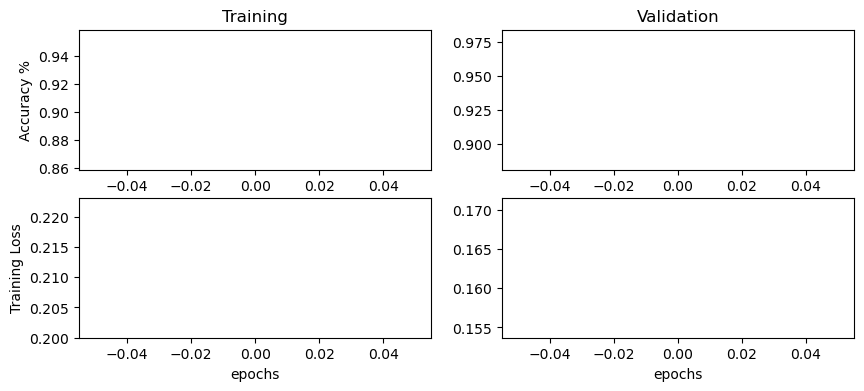

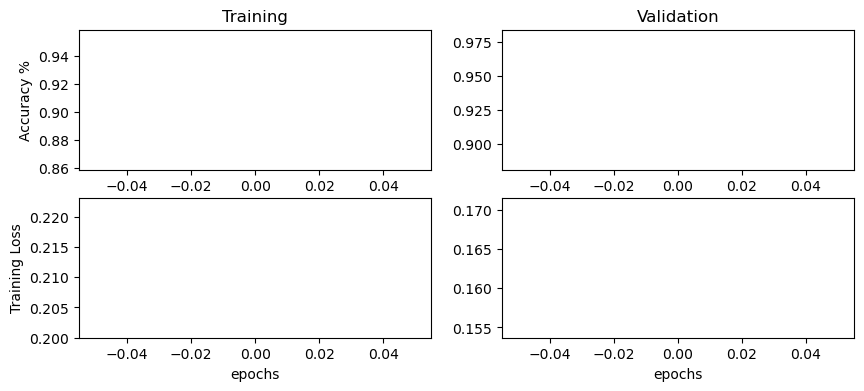

In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy %')
plt.title('Training')

plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')


plt.subplot(2,2,3)
plt.plot(history.history['Precision'])
plt.ylabel('Precision %')
plt.title('Training')

plt.subplot(2,2,4)
plt.plot(history.history['val_Precision'])
plt.title('Validation')


plt.subplot(2,2,5)
plt.plot(history.history['Recall'])
plt.ylabel('Recall %')
plt.title('Training')

plt.subplot(2,2,6)
plt.plot(history.history['val_Recall'])
plt.title('Validation')


plt.subplot(2,2,7)
plt.plot(history.history['auc'])
plt.ylabel('auc %')
plt.title('Training')

plt.subplot(2,2,8)
plt.plot(history.history['val_auc'])
plt.title('Validation')


plt.subplot(2,2,9)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,10)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')


#precision, recall, auc

In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['Precision'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_Precision'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [ ]:
plot_model(
    training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## model 2

In [ ]:
from tensorflow.keras.utils import FeatureSpace

# Crossing columns together 
feature_space2 = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('condition','model'), # dims: 7 x 14 = 
            crossing_dim=5*604),
        FeatureSpace.cross(
            feature_names=('trim','transmission',), # 7 x 2 x 5
            crossing_dim=1124*2),
    ],
    output_mode="concat",
)
# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# add explanation of this pre-processing here
train_ds_with_no_labels2 = ds_train.map(lambda x, _: x)
feature_space2.adapt(train_ds_with_no_labels2)

In [ ]:
dict_inputs2 = feature_space2.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs2 = []

# for each crossed variable, make an embedding
for col in feature_space2.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space2, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs2.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch2 = Concatenate(name='wide_concat2')(crossed_outputs2)

# reset this input branch
all_deep_branch_outputs2 = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space2.preprocessors[col].output
    x = CastToFloat()(x) # cast an integer as a float here
    all_deep_branch_outputs2.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space2, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs2.append(x)


# merge the deep branches together
deep_branch2 = Concatenate(name='embed_concat')(all_deep_branch_outputs2)
deep_branch2 = Dense(units=100,activation='relu', name='deep1')(deep_branch2)
deep_branch2 = Dense(units=10,activation='relu', name='deep3')(deep_branch2)
    
# merge the deep and wide branch
final_branch2 = Concatenate(name='concat_deep_wide2')([deep_branch2, wide_branch2])
final_branch2 = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch2)

training_model2 = keras.Model(inputs=dict_inputs2, outputs=final_branch2)
training_model2.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

training_model2.summary()


Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ make (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ make[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ model[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ body[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ transmission[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ color[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ interior[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ state[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ trim[0][0]        │
│ (StringLookup)      │                   │            │                 

 Total params: 335,519 (1.28 MB)

 Trainable params: 335,513 (1.28 MB)

 Non-trainable params: 6 (32.00 B)

In [ ]:
plot_model(
    training_model2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
history2 = training_model2.fit(
    ds_train, epochs=5, validation_data=ds_test, verbose=2
)

Epoch 1/5
5222/5222 - 20s - 4ms/step - accuracy: 0.9303 - loss: 0.1689 - val_accuracy: 0.9368 - val_loss: 0.1520
Epoch 2/5
5222/5222 - 16s - 3ms/step - accuracy: 0.9395 - loss: 0.1456 - val_accuracy: 0.9388 - val_loss: 0.1471
Epoch 3/5
5222/5222 - 16s - 3ms/step - accuracy: 0.9420 - loss: 0.1394 - val_accuracy: 0.9407 - val_loss: 0.1440
Epoch 4/5
5222/5222 - 17s - 3ms/step - accuracy: 0.9439 - loss: 0.1351 - val_accuracy: 0.9417 - val_loss: 0.1424
Epoch 5/5
5222/5222 - 17s - 3ms/step - accuracy: 0.9454 - loss: 0.1320 - val_accuracy: 0.9417 - val_loss: 0.1418


Text(0.5, 0, 'epochs')

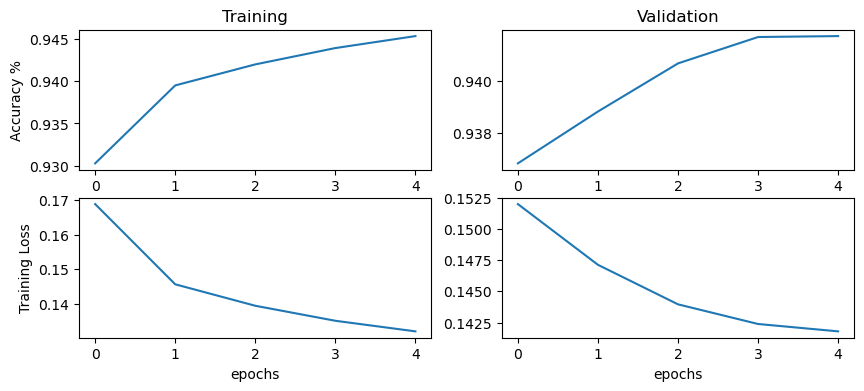

In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history2.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history2.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history2.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')

In [ ]:
plot_model(
    training_model2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## next model 3

In [ ]:
from tensorflow.keras.utils import FeatureSpace

# Crossing columns together 
feature_space3 = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('condition','make'), # dims: 7 x 14 = 
            crossing_dim=5*49),
        FeatureSpace.cross(
            feature_names=('body','transmission',), # 7 x 2 x 5
            crossing_dim=8*2),
    ],
    output_mode="concat",
)
# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# add explanation of this pre-processing here
train_ds_with_no_labels3 = ds_train.map(lambda x, _: x)
feature_space3.adapt(train_ds_with_no_labels3)

In [ ]:
dict_inputs3 = feature_space3.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs3 = []

# for each crossed variable, make an embedding
for col in feature_space3.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space3, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs3.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch3 = Concatenate(name='wide_concat3')(crossed_outputs3)

# reset this input branch
all_deep_branch_outputs3 = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space3.preprocessors[col].output
    x = CastToFloat()(x) # cast an integer as a float here
    all_deep_branch_outputs3.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space3, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs3.append(x)


# merge the deep branches together
deep_branch3 = Concatenate(name='embed_concat')(all_deep_branch_outputs3)
deep_branch3 = Dense(units=100,activation='relu', name='deep1')(deep_branch3)
deep_branch3 = Dense(units=50,activation='relu', name='deep2')(deep_branch3)
deep_branch3 = Dense(units=25,activation='relu', name='deep3')(deep_branch3)
deep_branch3 = Dense(units=10,activation='relu', name='deep4')(deep_branch3)
    
# merge the deep and wide branch
final_branch3 = Concatenate(name='concat_deep_wide3')([deep_branch3, wide_branch3])
final_branch3 = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch3)

training_model3 = keras.Model(inputs=dict_inputs3, outputs=final_branch3)
training_model3.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

training_model3.summary()



Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ make (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ make[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ model[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ body[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ transmission[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ color[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ interior[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ state[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ trim[0][0]        │
│ (StringLookup)      │                   │            │                 

 Total params: 76,015 (296.94 KB)

 Trainable params: 76,009 (296.91 KB)

 Non-trainable params: 6 (32.00 B)

In [ ]:
plot_model(
    training_model3, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
history3 = training_model3.fit(
    ds_train, epochs=5, validation_data=ds_test, verbose=2
)

Epoch 1/5
5222/5222 - 19s - 4ms/step - accuracy: 0.9312 - loss: 0.1657 - val_accuracy: 0.9375 - val_loss: 0.1494
Epoch 2/5
5222/5222 - 15s - 3ms/step - accuracy: 0.9401 - loss: 0.1431 - val_accuracy: 0.9393 - val_loss: 0.1446
Epoch 3/5
5222/5222 - 15s - 3ms/step - accuracy: 0.9426 - loss: 0.1374 - val_accuracy: 0.9403 - val_loss: 0.1424
Epoch 4/5
5222/5222 - 15s - 3ms/step - accuracy: 0.9440 - loss: 0.1336 - val_accuracy: 0.9417 - val_loss: 0.1407
Epoch 5/5
5222/5222 - 15s - 3ms/step - accuracy: 0.9451 - loss: 0.1310 - val_accuracy: 0.9418 - val_loss: 0.1399


Text(0.5, 0, 'epochs')

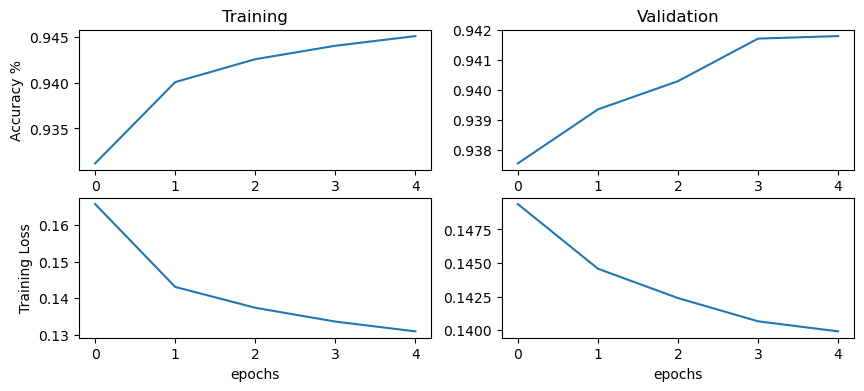

In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history3.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history3.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history3.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history3.history['val_loss'])
plt.xlabel('epochs')

In [ ]:
plot_model(
    training_model3, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## additional performance metrics

In [ ]:
# we only need to do this to use sklearn metrics 
y_test = tf.concat([y for x, y in ds_test], axis=0)
y_test = y_test.numpy()
y_test

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
# Use the sklearn metrics here, if you want to
from sklearn import metrics as mt

# now lets see how well the model performed
yhat_proba = training_model.predict(ds_test) # sigmoid output probabilities
# use squeeze to get rid of any extra dimensions 
yhat = np.round(yhat_proba.squeeze()) # round to get binary class

print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
[[37212  2533]
 [ 2321 41476]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     39745
           1       0.94      0.95      0.94     43797

    accuracy                           0.94     83542
   macro avg       0.94      0.94      0.94     83542
weighted avg       0.94      0.94      0.94     83542



## speeding up

In [ ]:
# Crossing columns together 
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('condition','make'), # dims: 7 x 14 = 
            crossing_dim=5*49, output_mode='int'),
        FeatureSpace.cross(
            feature_names=('body','transmission',), # 7 x 2 x 5
            crossing_dim=8*2, output_mode='int'),
        FeatureSpace.cross(
            feature_names=('interior','color'), # 14 x 16
            crossing_dim=17*20, output_mode='int'),
    ],
    output_mode="dict",
)
# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# add explanation of this pre-processing here
train_ds_with_no_labels = ds_train.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)


preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y), 
                                     num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
def setup_embedding_from_encoding(encoded_features, col_name):
    # what the maximum integer value for this variable?
    
    # get the size of the feature
    x = encoded_features[col_name]
    N = x.shape[1]
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  name=col_name+'_embed')(x)
    
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x


dict_inputs = feature_space.get_inputs() # need to use unprocessed features here, to gain access to each output
encoded_features = feature_space.get_encoded_features() # these features have been encoded

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space.crossers.keys():
    
    x = setup_embedding_from_encoding(encoded_features, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for col in numeric_headers:
    x = encoded_features[col]
    #x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_encoding(encoded_features, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

# encoded features input, fast
training_model = keras.Model(inputs=encoded_features, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

training_model.summary()

# non-encoded, perform redundant operations
inference_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
inference_model.compile(loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')])

c:\Users\jadon\anaconda3\Lib\site-packages\keras\src\models\functional.py:108: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'body' mapping to value <KerasTensor shape=(None, 8), dtype=float32, sparse=False, name=keras_tensor_568> which has name 'keras_tensor_568'. Change the tensor name to 'body' (via `Input(..., name='body')`)
  warnings.warn(
c:\Users\jadon\anaconda3\Lib\site-packages\keras\src\models\functional.py:108: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'color' mapping to value <KerasTensor shape=(None, 20), dtype=float32, sparse=False, name=keras_tensor_569> which has name 'keras_tensor_569'. Change the tensor name to 'color' (via `Input(..., name='color')`)
  warnings.warn(
c:\Users\jadon\anaconda3\Lib\site-packages\keras\src\models\functional.py:108: UserWarning: When providing `inputs` as a dict,

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_572CL… │ (None, 49)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_573CL… │ (None, 654)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_568CL… │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_575CL… │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_569CL… │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_571CL… │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_574CL… │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_576CL… │ (None, 1174)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_570CL… │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ make_embed          │ (None, 49, 7)     │        343 │ keras_tensor_572… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model_embed         │ (None, 654, 25)   │     16,350 │ keras_tensor_573… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body_embed          │ (None, 8, 2)      │         16 │ keras_tensor_568… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission_embed  │ (None, 2, 1)      │          2 │ keras_tensor_575… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color_embed         │ (None, 20, 4)     │         80 │ keras_tensor_569… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior_embed      │ (None, 17, 4)     │         68 │ keras_tensor_571… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state_embed         │ (None, 34, 5)     │        170 │ keras_tensor_574… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim_embed          │ (None, 1174, 34)  │     39,916 │ keras_tensor_576

 Total params: 2,906,407 (11.09 MB)

 Trainable params: 2,906,407 (11.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
plot_model(
    training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
history = training_model.fit(
    preprocessed_ds_train, epochs=1, validation_data=preprocessed_ds_test, verbose=2
)

5222/5222 - 210s - 40ms/step - accuracy: 0.9085 - loss: 0.2116 - val_accuracy: 0.9327 - val_loss: 0.1626


### Modeling (5 points total)
- [2 points] Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations.
Note: you can use the "history" return parameter that is part of Keras "fit" function to easily access this data.

- [2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two models (this "two" includes the wide and deep model trained from the previous step). Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to answer: What model with what number of layers performs superiorly? Use proper statistical methods to compare the performance of different models.

- [1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.  


### Exceptional Work (1 points total)
5000 students: You have free reign to provide additional analyses.
One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.

In [ ]:
print(embedding_weights.shape)

(50, 25)


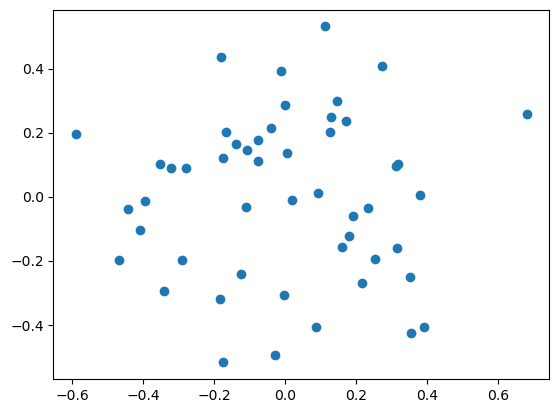

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'model' is your trained Keras model and 'embedding_layer_name' is the name of your embedding layer
embedding_layer = training_model.get_layer(name="deep2")
embedding_weights = embedding_layer.get_weights()[0]

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
embedding_weights_pca = pca.fit_transform(embedding_weights)

# Visualize the results
plt.scatter(embedding_weights_pca[:, 0], embedding_weights_pca[:, 1])
plt.show()

Here is our dimensionality reduction of our embeddings. We notice that although there aren't many tight clusters, some of the features appear to be close together. This helps the model know that these data are similar in some way, which helps it later predict.